sktime supports a number of commonly used forecasters, many of them interfaced from state-of-art forecasting packages. All forecasters are available under the unified sktime interface.

The main classes that are currently stably supported are:

 - ExponentialSmoothing, ThetaForecaster, and autoETS from statsmodels
 - ARIMA and autoARIMA from pmdarima
 - BATS and TBATS from tbats
 - PolynomialTrend for forecasting polynomial trends
 - Prophet which interfaces Facebook prophet
 
For illustration, all estimators below will be presented on the basic forecasting workflow - though they also support the advanced forecasting and evaluation workflows under the unified sktime interface (see Section 1).

For use in the other workflows, simply replace the "forecaster specification block" ("forecaster=") by the forecaster specification block in the examples presented below.

Generally, all forecasters available in sktime can be listed with the all_estimators command:

In [1]:
from sktime.registry import all_estimators


In [2]:
import pandas as pd


In [3]:
# all_estimators returns list of pairs - data frame conversion for pretty printing
all_estimators("forecaster", as_dataframe=True)

C:\Users\trana\.conda\envs\data_process\lib\site-packages\sktime\registry\_lookup.py:156: ImportWarning: No module named 'esig'. 'esig' is a soft dependency and not included in the sktime installation. Please run: `pip install esig`. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(str(e), ImportWarning)
C:\Users\trana\.conda\envs\data_process\lib\site-packages\sktime\registry\_lookup.py:156: ImportWarning: No module named 'pmdarima'. 'pmdarima' is a soft dependency and not included in the sktime installation. Please run: `pip install pmdarima`. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(str(e), ImportWarning)
C:\Users\trana\.conda\envs\data_process\lib\site-packages\sktime\registry\_lookup.py:156: ImportWarning: No module named 'tbats'. 'tbats' is a soft dependency and not included in the sktime installation. Please run: `pip install tbats`. To install all soft dependencies, run: `pip install sktime[al

,name,estimator
0,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
1,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
2,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
3,Croston,<class 'sktime.forecasting.croston.Croston'>
4,DirRecTabularRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
5,DirRecTimeSeriesRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
6,DirectTabularRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
7,DirectTimeSeriesRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
8,EnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.E...
9,ExponentialSmoothing,<class 'sktime.forecasting.exp_smoothing.Expon...


All forecasters follow the same interface, and can be used in the workflows presented in Section 1.

We proceed by showcasing some commonnly used classes of forecasters.

In [4]:
# imports necessary for this chapter
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# data loading for illustration (see section 1 for explanation)
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = ForecastingHorizon(y_test.index, is_relative=False)

2.1 exponential smoothing, theta forecaster, autoETS from statsmodels
sktime interfaces a number of statistical forecasting algorithms from statsmodels: exponential smoothing, theta, and auto-ETS.

For example, to use exponential smoothing with an additive trend component and multiplicative seasonality on the airline data set, we can write the following. Note that since this is monthly data, a good choice for seasonal periodicity (sp) is 12 (= hypothesized periodicity of a year).

In [5]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing


0.05027649577230748

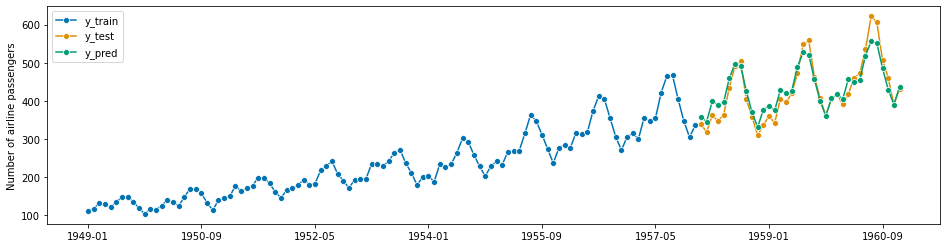

In [6]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

The exponential smoothing of state space model can also be automated similar to the ets function in R. This is implemented in the AutoETS forecaster.

In [7]:
from sktime.forecasting.ets import AutoETS


0.0631740557489316

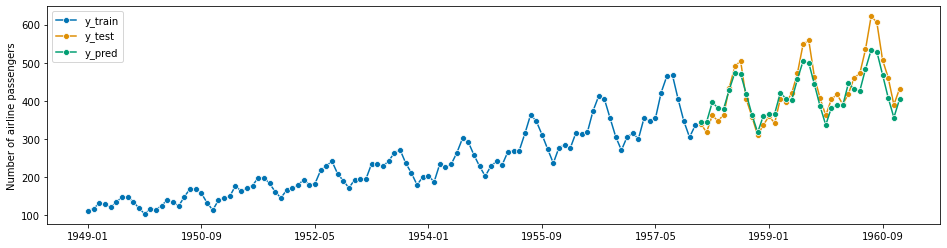

In [8]:
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

2.2 ARIMA and autoARIMA
sktime interfaces pmdarima for its ARIMA class models. For a classical ARIMA model with set parameters, use the ARIMA forecaster:

